In [67]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Q1 - What is the happiest continent?

In [118]:
country250 = pd.read_csv('/content/250CountryDataGen.csv', index_col=0)
whr = pd.read_csv('/content/WorldHappinessReportGen.csv', index_col=0)
whr_country250 = pd.merge(whr, country250, left_on='Country',right_on='name', how='inner')

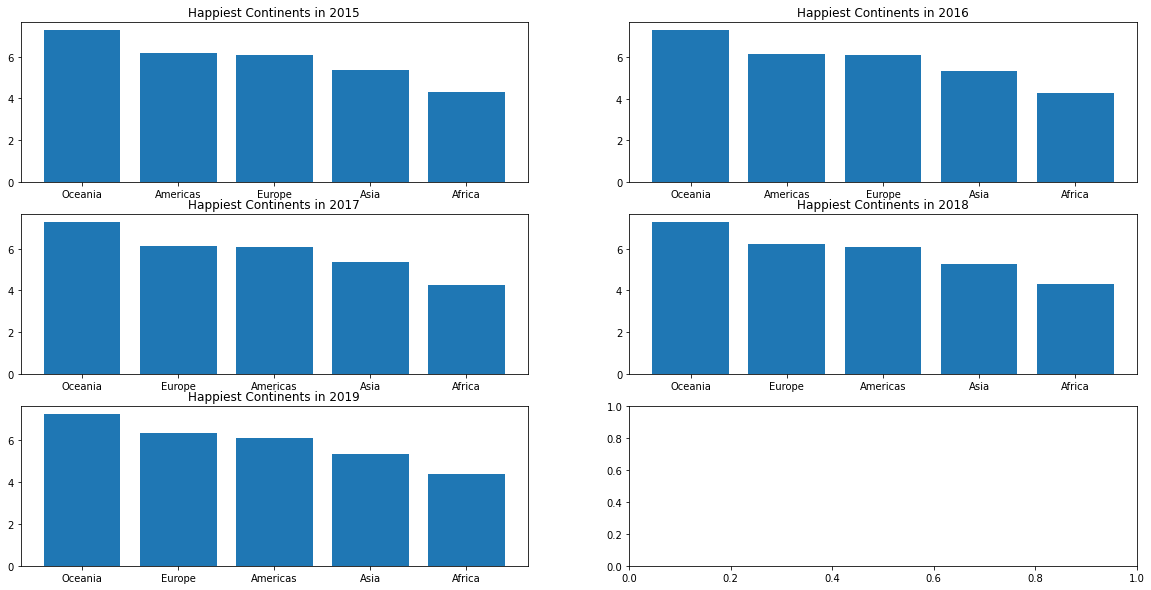

In [119]:
fig,a =  plt.subplots(3,2,figsize=(20,10))
for i in range(0,5):
  whr_country250_year = whr_country250[whr_country250['Year'] == i+2015]
  a[i//2][i%2].set_title("Happiest Continents in " + str(i+2015))
  regionHapp_year = whr_country250_year.groupby('region')['Happiness Score'].mean().sort_values(ascending=False)
  a[i//2][i%2].bar(regionHapp_year.index, regionHapp_year.values)
plt.show()

<BarContainer object of 5 artists>

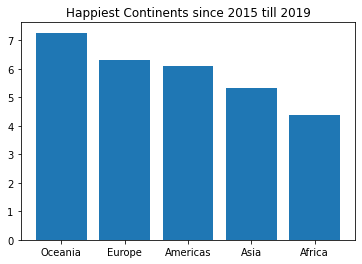

In [35]:
plt.title("Happiest Continents since 2015 till 2019")
regionHapp_year = whr_country250_year.groupby('region')['Happiness Score'].mean().sort_values(ascending=False)
plt.bar(regionHapp_year.index, regionHapp_year.values)

Oceania takes the title for the happieast Continent

#Q2 - Which sub-region in each continent is the happiest?

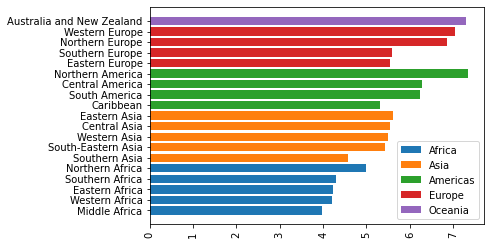

In [120]:
for r in whr_country250_year.groupby('region')['Happiness Score'].mean().sort_values(ascending=True).index:
  plt.figsize=(20,10)
  whr_country250_region = whr_country250[whr_country250['region'] == r]
  happyTop5 = whr_country250_region.groupby('subregion')['Happiness Score'].mean().sort_values(ascending=True)
  plt.barh(happyTop5.index, happyTop5.values , label=r)
  plt.xticks(rotation=90)
  plt.legend()

Australia and New Zealand, Western Europe, Northen America, Eastern Asia and Northern Africa are the happiest sub-regions

#Q3 - Does money buy happiness?

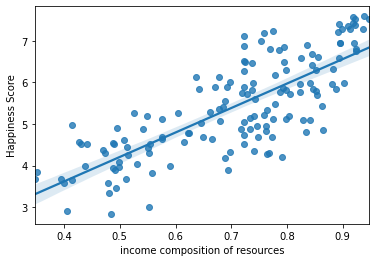

In [85]:
allData = pd.read_csv('/content/allDataMergedGen.csv', index_col=0)
allData.head()
sns.regplot(data = allData , x ='income composition of resources',y='Happiness Score')

Apparently it does ;)

#Q4 - Does schooling cause depression?

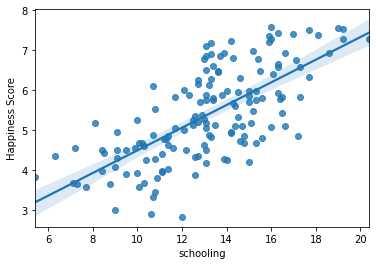

In [86]:
sns.regplot(data = allData , x ='schooling',y='Happiness Score')

Apparently not :) 



#Q5 - Do educated people live longer?

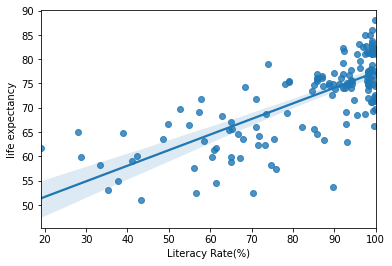

In [117]:
sns.regplot(data = allData , x ='Literacy Rate(%)',y='life expectancy')

That's a relief

#Q6 - Is africa uneducated as many think?

<BarContainer object of 5 artists>

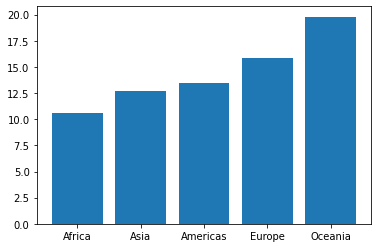

In [91]:
educated = allData.groupby('region')['schooling'].mean().sort_values(ascending=True)
plt.bar(educated.index, educated.values)

unfortunately yes :'(

#Q7 - What is egypt's rank according to education?

In [116]:
plt.figsize=(100,50)
educated = allData.sort_values(ascending=False, by='schooling', ignore_index=True)
print(educated[educated['Country'] == 'Egypt'])
print(educated.shape)

   Country  Happiness Score  ...  Employment Count  Literate Working Rate
74   Egypt            4.194  ...        79057140.0               1.171854

[1 rows x 41 columns]
(148, 41)


We are the 74th out of 148 countries.